Copyright 2018 The TensorFlow Datasets Authors, Licensed under the Apache License, Version 2.0

In [1]:
!pip install -q tensorflow-datasets tensorflow

In [45]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
for example in ds.take(1):
  image, label = example['image'], example['label']

  # matplotlib shenanigans
import matplotlib
plt_fontsize = matplotlib.rcParams["font.size"]

Workflow


In [100]:
# load
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
# preprocess
train_images = train_images.reshape((60000, 28 * 28)) #reshape flattens 28*28 arrays
train_images = train_images.astype('float32') / 255 # cast as float
test_images = test_images.reshape((10000, 28 * 28)) #to vector of 784 elemnt
test_images = test_images.astype('float32') / 255 #recale t0 [0,1]

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# build
model = tf.keras.models.Sequential()
model.add(tf.keras.Input((28 * 28,)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8721 - loss: 0.4441
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9660 - loss: 0.1136
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9792 - loss: 0.0715
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9844 - loss: 0.0520
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9893 - loss: 0.0369
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0861
Test accuracy: 0.9779000282287598


In [101]:
def mnist_peek(rows, cols):
    fig, axs = plt.subplots(rows, cols)
    for i in range(rows):
        for j in range(cols):
            # Reshape the image data to 2D before displaying
            image = train_images[i * cols + j].reshape(28, 28)
            axs[i, j].imshow(image, cmap=plt.cm.binary)

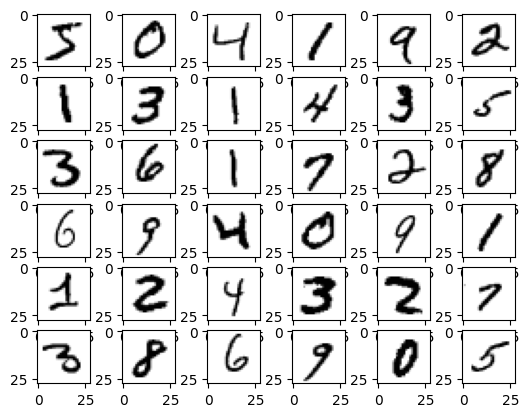

In [102]:
mnist_peek(6, 6)

In [103]:
print(train_images[1:])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# **Use the model **

In [104]:
preds = model.predict(test_images[1:], verbose=0) # note the syntax: test_images[:1] keeps the batch dimension!
print(f"preds: {preds}")
argm = np.argmax(preds[0]) #gives hights index
print(f"predicted class: {argm}")
for i, x in enumerate(preds[0]):
    if i == argm:
        print(f"\033[1mclass: {i:2} with probability: {x:.15f}\033[0m")
    else:
        print(f"class: {i:2} with probability: {x:.15f}")


preds: [[5.3956562e-08 2.5565081e-04 9.9965668e-01 ... 5.1826382e-13 1.3096320e-05 6.1017532e-12]
 [5.0533646e-07 9.9978518e-01 2.5972386e-05 ... 8.5510605e-05 5.5231070e-05 2.2123484e-06]
 [9.9992973e-01 3.7962256e-08 1.3280176e-05 ... 1.4714317e-05 3.7633563e-09 2.3270255e-05]
 ...
 [2.5749364e-11 8.0117984e-10 3.2891361e-12 ... 1.1561057e-05 2.7346911e-08 1.5973334e-05]
 [7.3356517e-08 6.3576683e-10 4.1872623e-11 ... 1.1527301e-07 3.5480258e-05 3.0621478e-10]
 [6.4569132e-09 3.4907736e-12 1.6953030e-09 ... 6.7836856e-14 1.2525482e-10 2.1703013e-11]]
predicted class: 2
class:  0 with probability: 0.000000053956562
class:  1 with probability: 0.000255650811596
class:  2 with probability: 0.999656677246094
class:  3 with probability: 0.000068017201556
class:  4 with probability: 0.000000000001321
class:  5 with probability: 0.000006120328180
class:  6 with probability: 0.000000529335693
class:  7 with probability: 0.000000000000518
class:  8 with probability: 0.000013096319890
class:  

# Visualising a prediction

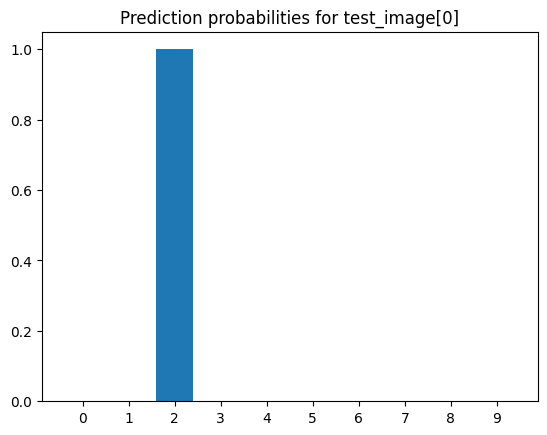

In [105]:
fig, ax = plt.subplots()
ax.bar([str(x) for x in range(10)], preds[0]) # preds.shape: (1, 10)
plt.title("Prediction probabilities for test_image[0]")
plt.show()

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


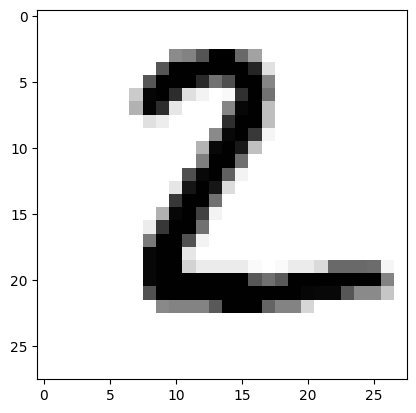

In [107]:
# print(np.argmax(preds[0]))
# print(f"compare: {test_images[:1].shape} and {test_images[0].shape}")
# # does the prediction agree with the label?
# print(test_labels[0])
plt.imshow(test_images[1].reshape(28, 28), cmap=plt.cm.binary)
print(test_labels)
print(test_labels[0])
